# Задание 1. Проведите EDA
Описание данных приведено в отдельном файле.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline
from google.colab import drive, files
import pylab

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv(file_path)
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

In [ ]:
data.head(10)

,Answer,inn_act,novelty,inn_prod,size,climate,age,competition,technologe_acq,RD,...,main_ag,Int_property,boss_experience,papers,wifi,MBA,passport,mortgage,green,Type
0,1,0.0,0.00,0.00,4.0,7.0,35.0,3,1,0.46,...,1.0,0,0,0,0,0,18.8,7.1,1,2
1,1,0.0,0.00,0.00,6.0,8.0,64.0,1,0,0.14,...,1.0,1,0,79,0,0,19.6,15.7,2,2
2,1,1.0,0.24,0.78,3.0,8.0,26.0,2,0,0.03,...,1.0,0,1,110,0,0,26.4,9.6,1,1
3,0,0.0,0.00,0.00,5.0,2.0,55.0,3,0,0.16,...,1.0,0,0,0,0,0,52.6,18.1,1,4
4,1,1.0,0.18,0.91,5.0,5.0,43.0,3,1,0.60,...,3.0,1,1,0,0,0,8.3,13.4,3,1
5,1,1.0,0.16,0.74,7.0,10.0,64.0,3,0,0.60,...,1.0,1,1,42,0,0,13.8,3.6,2,1
6,0,0.0,0.00,0.00,6.0,3.0,36.0,1,0,0.00,...,1.0,1,0,0,0,0,67.2,0.9,2,4
7,1,1.0,0.07,0.85,7.0,6.0,47.0,3,0,0.42,...,3.0,1,1,117,0,0,29.7,5.9,4,1
8,0,1.0,0.08,0.20,7.0,1.0,61.0,1,0,0.53,...,1.0,0,1,26,0,1,60.7,7.1,1,3
9,1,0.0,0.00,0.00,2.0,8.0,71.0,3,0,0.52,...,1.0,1,0,0,1,0,24.8,13.6,2,2


In [ ]:
data.describe()

,Answer,inn_act,novelty,inn_prod,size,climate,age,competition,technologe_acq,RD,...,main_ag,Int_property,boss_experience,papers,wifi,MBA,passport,mortgage,green,Type
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,...,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,0.444041,0.481831,0.096628,0.237834,4.694767,5.073401,49.212936,2.907703,0.248547,0.265182,...,1.180233,0.438227,0.481831,34.103198,0.236192,0.061773,37.581468,9.246076,1.521802,2.630087
std,0.497039,0.499851,0.154323,0.304236,2.526917,3.138220,14.090683,1.240902,0.432327,0.206641,...,0.647963,0.496350,0.499851,42.736447,0.424896,0.240831,19.042908,5.432982,0.663515,1.267414
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,38.000000,2.000000,0.000000,0.070000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.900000,4.400000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,51.000000,3.000000,0.000000,0.250000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,36.500000,9.100000,1.000000,3.000000
75%,1.000000,1.000000,0.130000,0.480000,7.000000,8.000000,61.000000,4.000000,0.000000,0.430000,...,1.000000,1.000000,1.000000,69.000000,0.000000,0.000000,50.750000,13.925000,2.000000,4.000000
max,1.000000,1.000000,0.790000,0.930000,9.000000,10.000000,72.000000,5.000000,1.000000,0.670000,...,5.000000,1.000000,1.000000,133.000000,1.000000,1.000000,87.200000,18.900000,5.000000,4.000000


### Сбалансирована ли выборка?

In [ ]:
pd.pivot_table(data, values='novelty', index='Answer',
                       columns=['inn_act'], aggfunc="count")

inn_act,0.0,1.0
Answer,,
0,523,242
1,190,421


## Отличия характеристик предприятий в зависимости от статуса инновационной активности

In [ ]:
# здесь мы вводим переменную типа компании согласно требованиям семинара
data.loc[(data.Answer == 0)&(data.inn_act == 0), 'Type'] = 4
data.loc[(data.Answer == 0)&(data.inn_act == 1), 'Type'] = 3
data.loc[(data.Answer == 1)&(data.inn_act == 0), 'Type'] = 2
data.loc[(data.Answer == 1)&(data.inn_act == 1), 'Type'] = 1
data['Type'].value_counts()

4    523
1    421
3    242
2    190
Name: Type, dtype: int64

### Доля продаж инновационной продукции среди всех продаж предприятия

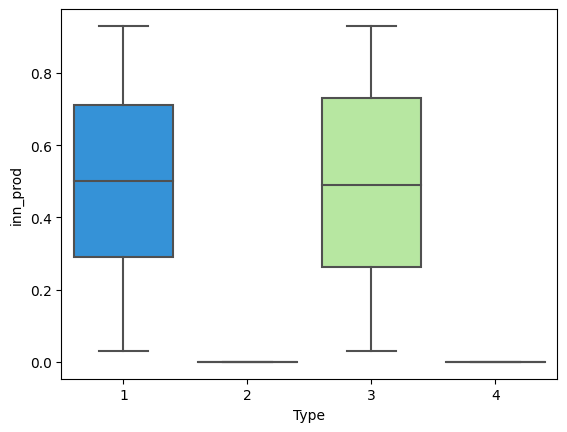

In [ ]:
sns.boxplot(x="Type", y="inn_prod", data=data, palette='rainbow');

Начавшие инновационную деятельность предприятия и неиновационные предприятия не производят инновационную продукцию.  
Основываясь на доле продаж инновационной продукции среди всех продаж предприятия сложно предсказать, завершат ли они свою инновационную деятельность в 2018 году.  
Предположим, компания принимает решение о прекращении выпуска инновационной продукции. Тогда такое распределение связано с тем, что на выпуск инновационной продукции необходим фиксированный объем вложений: зарплаты специалистам, поддержка оборудования и т.д. Если предприятие производит инновационную продукцию, ей необходимо финансировать все стадии ее производства и, соответсвенно, выделять на это достаточно инвестиций. Большего размаха у предприятий, которые завершат свою инновационную деятельность, не происходит, т.к. такие решения принимаются заранее и прекращение выпуска продукции равномерно распределено до последнего месяца.

### Рыночная новизна продукции

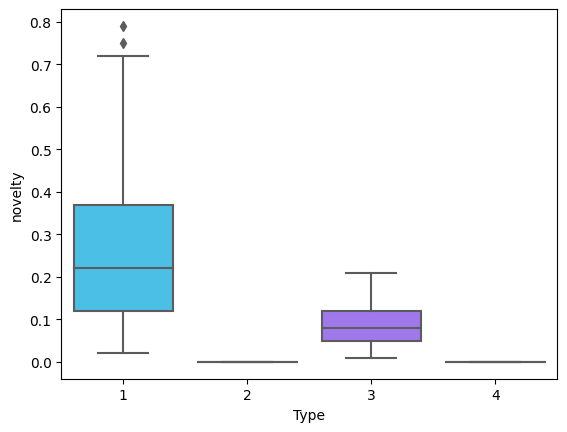

In [ ]:
sns.boxplot(x="Type", y="novelty", data=data, palette='cool');

Компании завершившие инн. деятельность, приняли такое решение из-за того, что их продукция перестала быть новой для рынка (ушла из-за отсутствия успешности)

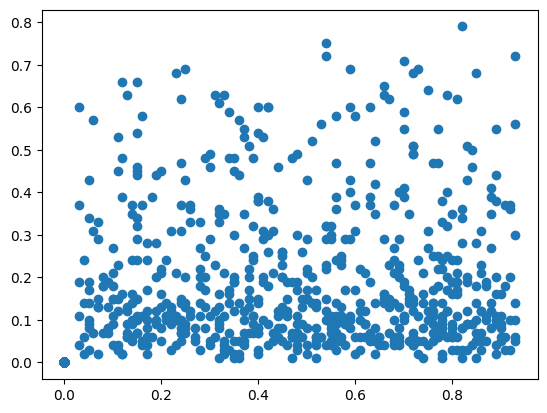

In [ ]:
plt.scatter(data.inn_prod, data.novelty)

Переменные нормализированы к разным показателям (inn_prod к общим продажам компании, novelty к инновационным продажам), что объясняет отсутствие зависимости.

###  Технологичнская новизна продукции

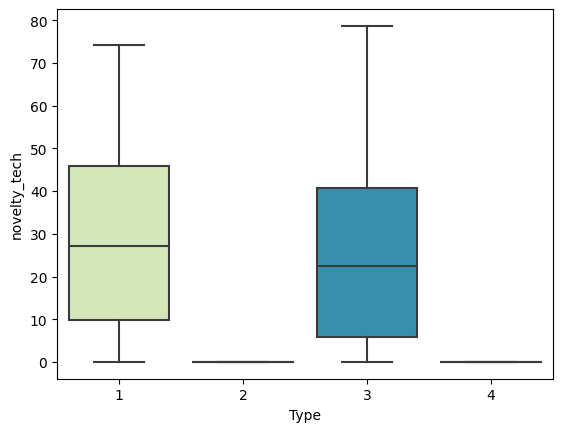

In [ ]:
sns.boxplot(x="Type", y="novelty_tech", data=data, palette='YlGnBu');

### Затраты на исследования и разработку новой продукции

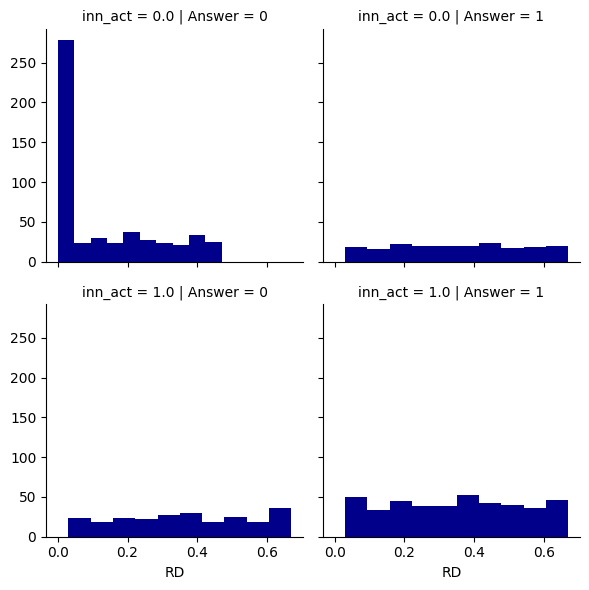

In [ ]:
g = sns.FacetGrid(data, col="Answer", row="inn_act")
g = g.map(plt.hist, "RD", color='darkblue');

Компании, которые не вкладывали в исследования и разработку и которые не планируют вкладывать, от них не следует ожидать, что они станут инновационно-активными в следующем году.  
Мы смотрим на данные по разным продуктам, которые требуют разных затрат на исследования и разработку, поэтому доли затрат равномерно распределены у других.
Также у компаний, которые инновационно активны и продолжат таковыми быть, наблюдается менее равномерное распределение. Это может быть как случайностью, так и следствием того, что они уже поняли, пользуется ли их продукция спросом или нет, и решили увеличить/уменьшить долю расходов на исследования и разработку.

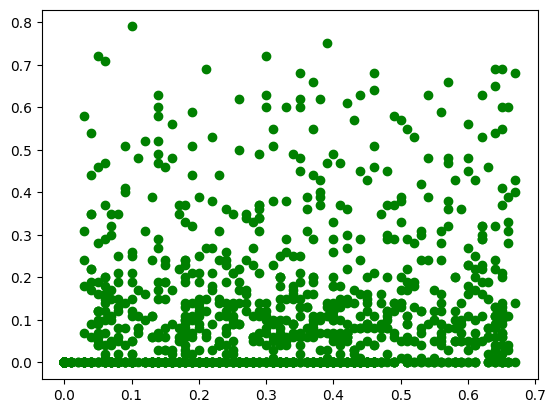

In [ ]:
plt.scatter(data.RD, data.novelty, color='green')

Затраты на исследования и разработку имеют временной лаг, они дают результат позже, поэтому сравнивать некорректно все по текущему периоду. Это объясняет отсутствие зависимости.

### Оценка делового климата

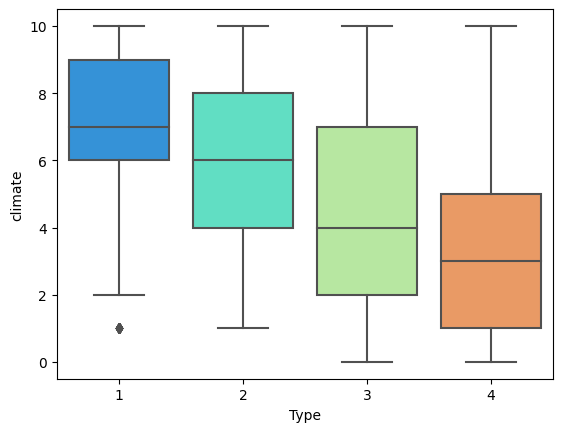

In [ ]:
sns.boxplot(x="Type", y="climate", data=data, palette='rainbow');

Компании, которые оценивают инвестиционный климат лучше, с большей вероятностью останутся инновационными в следующем году.
Чем меньше компания будет инновационной в будущем, тем хуже она оценивает инновационный климат.

### Оценка уровня конкуренции

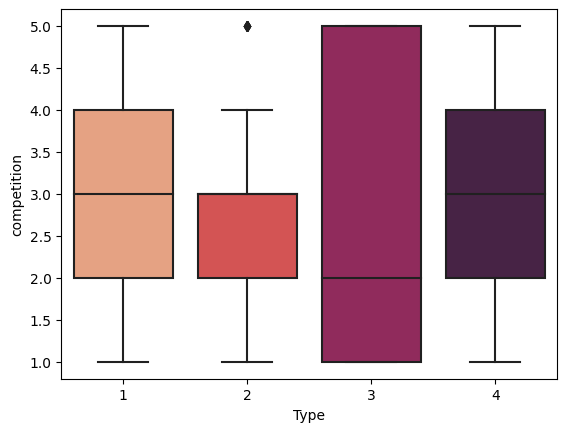

In [ ]:
sns.boxplot(x="Type", y="competition", data=data, palette='rocket_r');

Некоторые завершили в 2018 году свою инновационную деятельность из-за высокой конкуренции - этим объясняются высокие значения.
Низкие - т.к. нет конкуренции из-за того, что они создали идеальный продукт, который распространился на рынке и пока нет перспектив его замены.
Компании неинновационные не пытаются конкурировать за инновационность, поэтомуоценивают конкурентоспособность своей продукции средне. 1 и 4 - они устоявшиеся на своих рынках (инновационном и неиновационном соответственно).

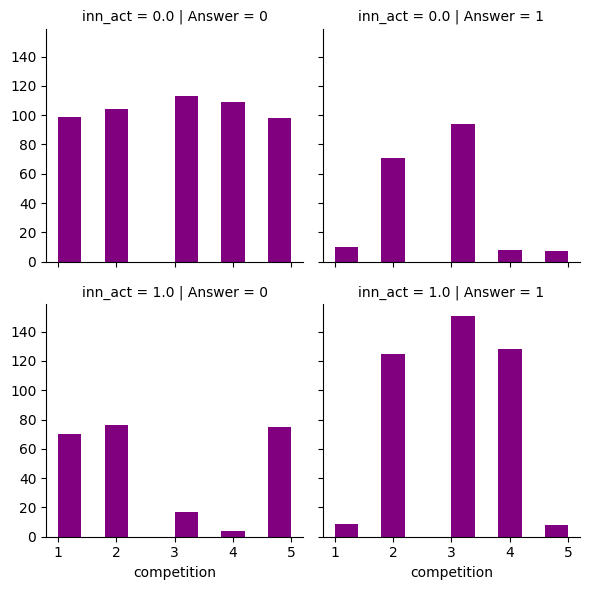

In [ ]:
g = sns.FacetGrid(data, col="Answer", row="inn_act")
g = g.map(plt.hist, "competition", color='Purple');

Компании типа 2 оптимистично оценивают свои возможности на рынке, из-за чего они и решили начать инновационную деятельность.  
Компании типа 3 либо были выдавлены из рынка из-за высокой конкуренции, либо решили сами уйти из рынка, так как он нерентабельный, что обьясняет отсутствие других игроков на рынке, и, соответственно, низкие оценки конкрентности.  
Компании типа 1 и 4 являются устоявшимися на своем рынке, поэтому они более адекватно оценивают эти рынки и свои способности противостоять конкуренции.

# Задание 2. Обучите модель случайного леса без отбора показателей

In [ ]:
from sklearn import ensemble, model_selection, metrics

In [ ]:
Answer = data.Answer
others_data = data.iloc[:, 1:]
others_data=others_data.drop(columns=['Type'])

In [ ]:
classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [ ]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(classifier_low_depth, others_data, Answer,
                                                                       train_sizes=np.arange(0.1,1., 0.2),
                                                                       cv=3, scoring='accuracy')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(others_data, Answer, test_size=0.33, random_state=42)

classifier_low_depth.fit (X_train, y_train)
tree_low = classifier_low_depth.estimators_[5]

from sklearn.tree import export_graphviz
import pydot

export_graphviz(tree_low, out_file = 'tree_low.dot', feature_names = others_data.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_low.dot')

graph.write_png('tree_low.png')

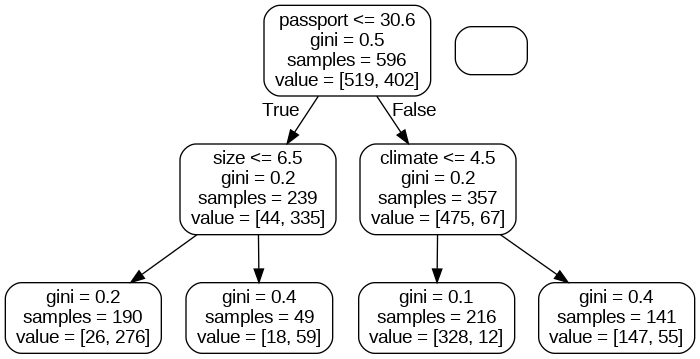

In [ ]:
from IPython import display
display.Image("tree_low.png")

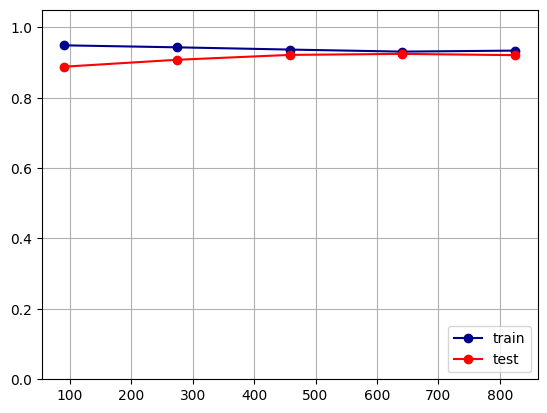

In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'darkblue', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [ ]:
classifier_low_depth.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=1)

In [ ]:
classifier_low_depth.score(X_test, y_test)

0.9208791208791208

Подробное описание кода  
Мы обучили модель случайного леса с 50 деревьями максимальной глубины 2, и вывели итог (вопросы для получения предсказания модели).  
Потом мы оценили кривую обучения (learning curve) который дает точность для разных размеров обучающих выборок, и построили ее (как списком, так и отдельно на графике).  
Точность на обучающей выборке немного падает по мере уменьшения ее размера, что ожидаемо. При этом, точности на обучающих и тестовых выборках конвергируются, что говорит о хорошем качестве модели и отсутствии недо/пере- обученности.  
Точность на тестовой выборке 92%  

In [ ]:
classifier_high_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 10)

In [ ]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(classifier_high_depth, others_data, Answer,
                                                                       train_sizes=np.arange(0.1,1, 0.2),
                                                                       cv=3, scoring='accuracy')

In [ ]:

classifier_high_depth.fit (X_train, y_train)
tree_high = classifier_high_depth.estimators_[5]

from sklearn.tree import export_graphviz
import pydot

export_graphviz(tree_high, out_file = 'tree_high.dot', feature_names = others_data.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_high.dot')
# Записываем граф в png file
graph.write_png('tree_high.png')

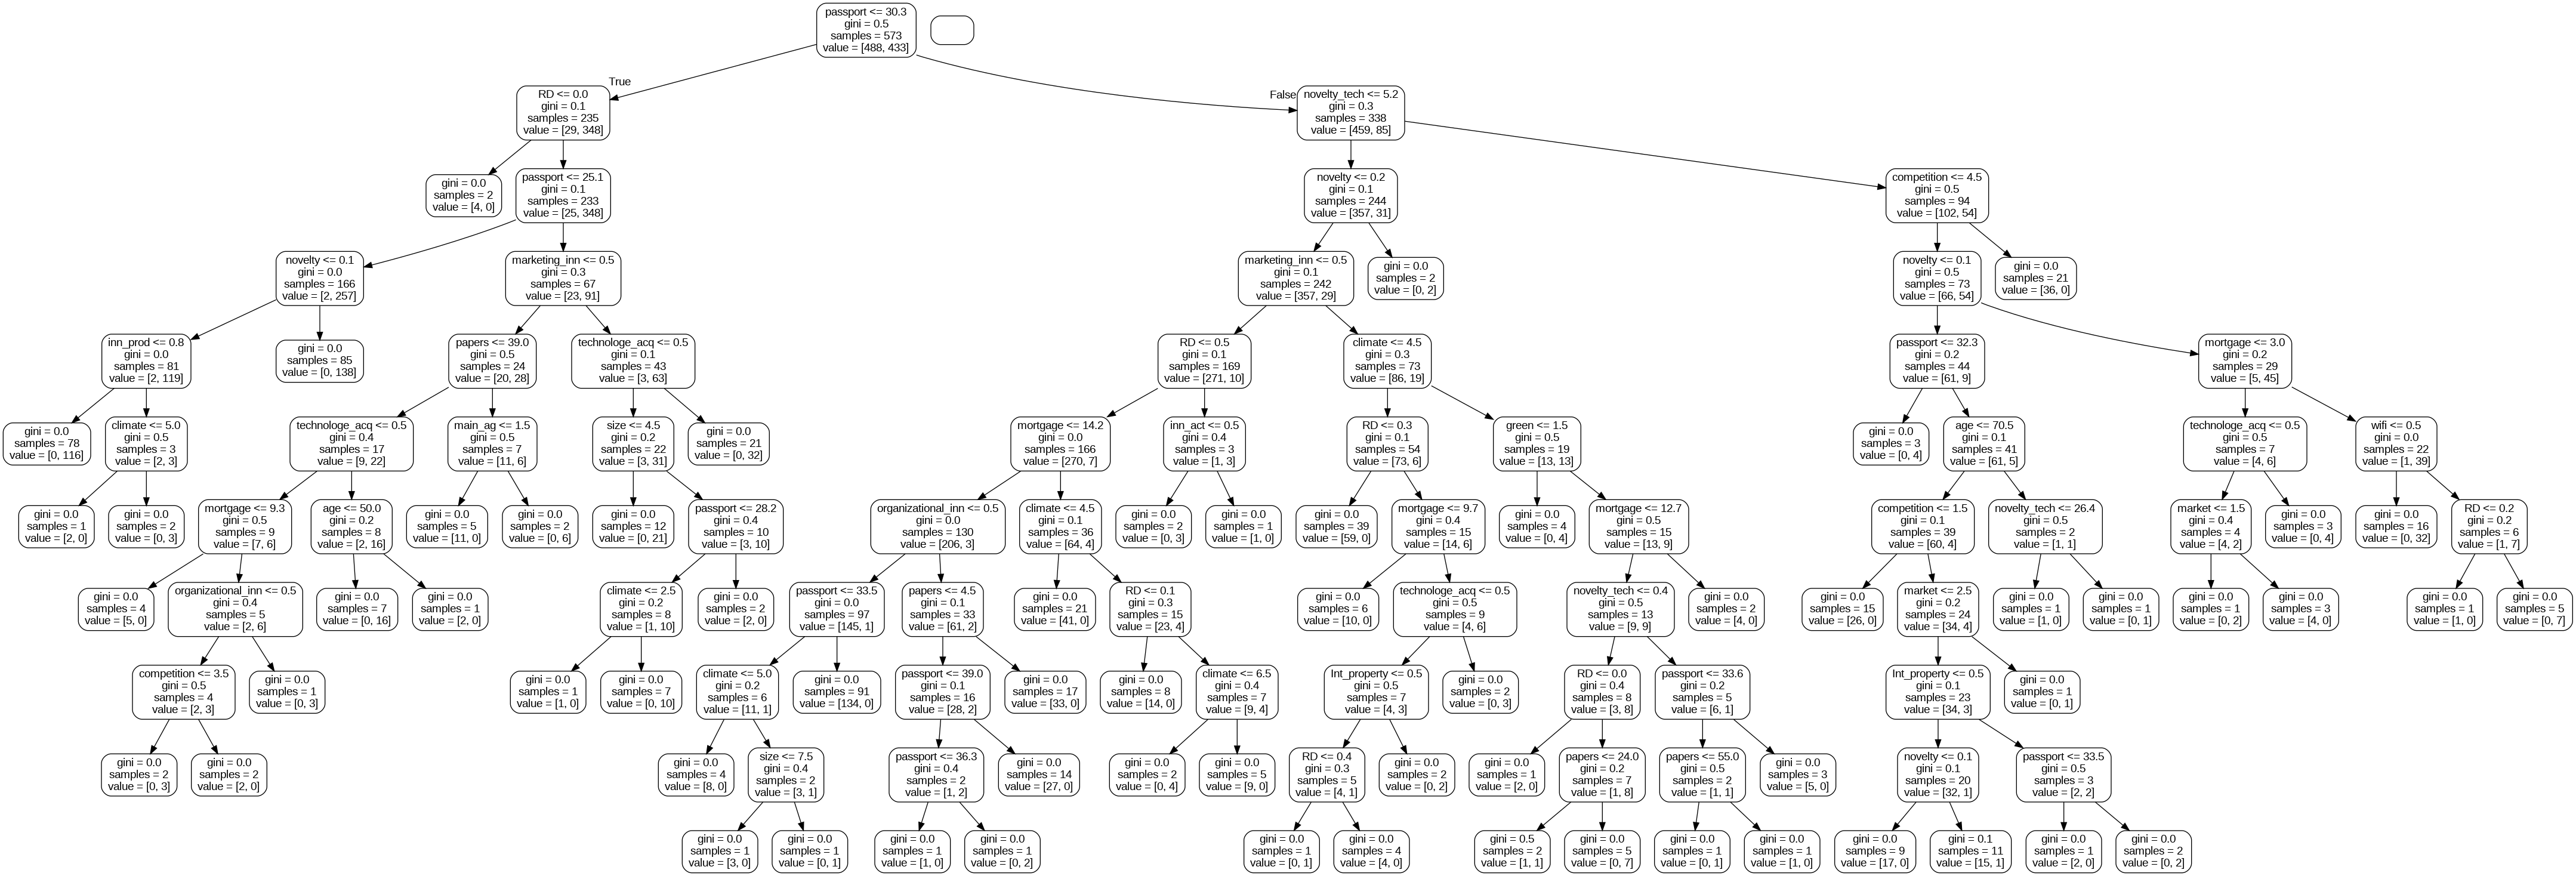

In [ ]:
from IPython import display
display.Image("tree_high.png")

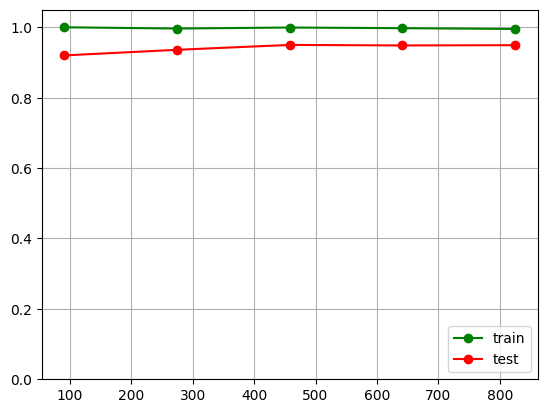

In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'green', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'red', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(others_data, Answer, test_size=0.33, random_state=10)

In [ ]:
classifier_high_depth.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=10)

In [ ]:
f'{classifier_high_depth.score(X_test, y_test):.2g}'

'0.95'

Объяснение и интерпретация различий  
Мы обучили модель случайного веса максимальной глубиной 10 и повторили шаги с маленьким деревом.  
Точность на глубоком дереве выше на 2%, что ожидаемо и несущественно.  
Из графика learning curve мы можем понять, что недо- или переобучение отсутствует.
Итак, более глубокая модель является чуть точнее более точной по сравнению с неглубокой.

## Значимость параметров модели

In [ ]:
imp = pd.DataFrame({'feature': list(others_data.columns),
                   'importance': classifier_high_depth.feature_importances_}).\
                    sort_values('importance', ascending = False)

imp.head(23)

,feature,importance
19,passport,0.321835
1,novelty,0.125905
7,technologe_acq,0.107175
4,climate,0.096985
8,RD,0.075844
6,competition,0.031795
10,novelty_tech,0.029192
2,inn_prod,0.027171
11,marketing_inn,0.026672
9,market,0.023344


Наличие загран паспортов говорит о том, что сотрудники, как правило, больше зарабатывают, а значит являются узкими специалистами, которые могут имеют компетенции в области инноваций. Также, они могут использовать эти заграничные поездки для участия в конференциях или других бизнес-митапов для перенятия опыта внедрения инноваций или перенятия идей/продуктов, которые являются устоявшимися для иностранного рынка, но в то же время являются новыми для рынка компании или ее самой.

# Задание 3. Проведите отбор параметров

### Удаление признаков на основании здравого смысла

In [ ]:
selected_features_temp = others_data.drop(columns=['wifi', 'green', 'organizational_inn'])

Объяснение сделанного выбора (необходимо удалить не менее 4 показателей)  
* wifi - наличие открытой сети является скорее решением ИТ поддержки, и,
соответственно, может служить индикатором деятельности только службы ИТ поддержки  
* green - озеленненность офиса (кол-во растений) хоть и решается сотрудниками компании, но он может служить только индикатором любви сотрудников к растениям  
* mortgage - наличие ипотеки служит индикатором того, как сотрудникам предпочитает распоряжаться своим доходом, но не говорит ничего о его стремлении к инновациям  
* organizational_inn - организационные инновации влияют на структуру компании и порядок ее работы, но никак на содержании этой работы (например, инновационная деятельность). Было бы разумно предположить, что вслед за организационными инновациями некоторые компании захотели бы поменять наполнение своей работы, начав инновационную деятельность. Однако, одни только организационные изменения требуют значительных временных затрат, поэтому шанс того, что организационные и содержательные изменения (старт инновационной деятельности) произойдут последовательно в течении одного года, крайне мал.

### Удаление признаков на основании коэффициентов корреляции

In [ ]:
df = data.drop('Type', axis=1)
srs = df.corr().abs().stack()['Answer']
srs.sort_values(ascending=False)[srs < 0.2].index.tolist()

['size',
 'green',
 'Int_property',
 'organizational_inn',
 'age',
 'wifi',
 'papers',
 'competition',
 'mortgage',
 'MBA']

In [ ]:
selected_features = selected_features_temp.drop(columns=['size',
 'Int_property',
 'age',
 'papers',
 'competition',
 'MBA'])

In [ ]:
selected_features

,inn_act,novelty,inn_prod,climate,technologe_acq,RD,market,novelty_tech,marketing_inn,main_ag,boss_experience,passport,mortgage
0,0.0,0.00,0.00,7.0,1,0.46,2,0.00,1.0,1.0,0,18.8,7.1
1,0.0,0.00,0.00,8.0,0,0.14,1,0.00,1.0,1.0,0,19.6,15.7
2,1.0,0.24,0.78,8.0,0,0.03,1,4.85,1.0,1.0,1,26.4,9.6
3,0.0,0.00,0.00,2.0,0,0.16,1,0.00,0.0,1.0,0,52.6,18.1
4,1.0,0.18,0.91,5.0,1,0.60,3,0.73,1.0,3.0,1,8.3,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,0.0,0.00,0.00,1.0,0,0.00,1,0.00,1.0,1.0,0,53.7,7.4
1372,1.0,0.13,0.57,5.0,0,0.65,2,70.33,1.0,1.0,1,41.8,15.9
1373,1.0,0.05,0.16,6.0,0,0.33,1,17.80,0.0,1.0,1,36.0,17.0
1374,0.0,0.00,0.00,10.0,0,0.00,1,0.00,0.0,1.0,0,81.1,6.7


Объяснение сделанного выбора  
Мы удаляем показатели, имеющие низкую корреляцию с прогнозируемым показателем, так как это говорит о очень слабой прямой связи данного показателя с обьясняемой переменной

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(selected_features, Answer, test_size=0.2)

In [ ]:
# Обучение модели случайного леса на новых данных (выбор количества и глубины деревьев самостоятельный)
classifier_own = ensemble.RandomForestClassifier()
classifier_own.fit(x_train, y_train)
max([estimator.tree_.max_depth for estimator in classifier_own.estimators_])

19

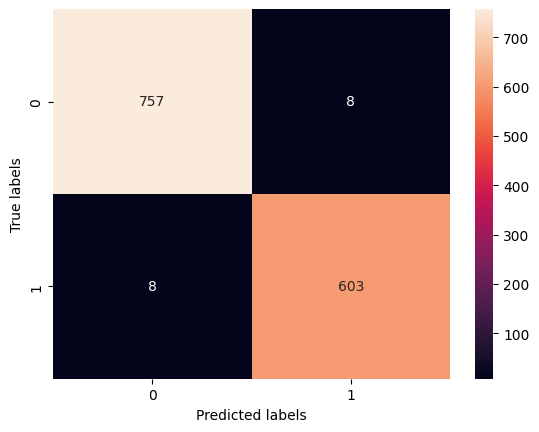

In [ ]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

sns.heatmap(confusion_matrix(Answer, classifier_own.predict(selected_features)), annot=True, fmt='g')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

Интерпретация матрицы ошибок  
Очень хороший результат, подавляющее большинство наблюдений правильно классифицированы

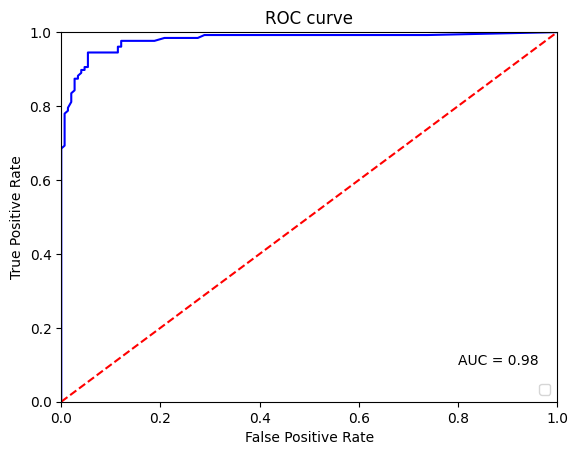

In [ ]:
# ROC-кривая
import sklearn.metrics as metrics


probs = classifier_own.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, [second for first, second in classifier_own.predict_proba(x_test)])
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC curve')
plt.plot(fpr, tpr, 'b')
plt.text(0.8,0.1,f'AUC = {roc_auc:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
f'{classifier_own.score(x_test, y_test):.2g}'

'0.94'

In [ ]:
# Важность показателей модели
pd.DataFrame({'feature': selected_features.columns.tolist(),
  'importance': classifier_own.feature_importances_}).set_index('feature').sort_values(by='importance', ascending=False).style.format('{:.2g}')

,importance
feature,
passport,0.42
climate,0.12
novelty,0.11
RD,0.1
technologe_acq,0.074
mortgage,0.032
marketing_inn,0.03
main_ag,0.029
novelty_tech,0.027


### Интерпретация результатов модели
Для построения модели использовались показатели по умолчанию: кол-во деревьев - 100, без ограничения по глубине.  
На матрице ошибок и ROC кривой мы убедились, что качество модели высокое.  
Точность модели на тесте равняется 96%.  
Переменная 'passport' является наиболее важной с существенным разрывом от других показателей.

### Сравнение с моделью без удаления признаков
Тестовая точность модели с удалением признаков оказалась на 1% выше, чем у модели со всеми признаками и глубиной 10. Это обьясняется тем, что у модели с удалением признаков нет ограничения по глубине деревьев.
Как и в предыдущих моделях, 'passport' является наиболее важным показателем, только сейчас разрыв в показателе важности стал еще выше.